# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.compose import make_column_transformer, TransformedTargetRegressor, ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error
import numpy as np
import plotly.express as px
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [243]:
vehicles = pd.read_csv('data/vehicles.csv')

In [244]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [245]:
vehicles.head(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [246]:
vehicles.tail(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426870,7301592119,wyoming,22990,2020.0,hyundai,sonata se sedan 4d,good,NaN,gas,3066.0,clean,other,5NPEG4JAXLH051710,fwd,NaN,sedan,blue,wy
426871,7301591639,wyoming,17990,2018.0,kia,sportage lx sport utility 4d,good,NaN,gas,34239.0,clean,other,KNDPMCAC7J7417329,NaN,NaN,SUV,NaN,wy
426872,7301591201,wyoming,32590,2020.0,mercedes-benz,c-class c 300,good,NaN,gas,19059.0,clean,other,55SWF8DB6LU325050,rwd,NaN,sedan,white,wy
426873,7301591202,wyoming,30990,2018.0,mercedes-benz,glc 300 sport,good,NaN,gas,15080.0,clean,automatic,WDC0G4JB6JV019749,rwd,NaN,other,white,wy
426874,7301591199,wyoming,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,clean,automatic,JTHBZ1BLXJA012999,rwd,NaN,sedan,white,wy
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [247]:
vehicles.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [248]:
vehicles = vehicles.drop_duplicates(vehicles)

In [249]:
vehicles.shape

(426880, 18)

In [250]:
#Drop the rows where the manufacturer and model is missing
cleaned_df = vehicles.dropna(subset=['model', 'manufacturer'])

In [251]:
cleaned_df = cleaned_df.drop(columns=['id', 'VIN'])
cleaned_df['condition'].fillna('unknown', inplace=True)
for col in ['cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']:
  cleaned_df[col].fillna('unknown', inplace=True)

In [252]:
cleaned_df.isnull().sum()

region             0
price              0
year               6
manufacturer       0
model              0
condition          0
cylinders          0
fuel               0
odometer        4137
title_status       0
transmission       0
drive              0
size               0
type               0
paint_color        0
state              0
dtype: int64

In [253]:
cleaned_df = cleaned_df.dropna(subset=['year','odometer'])

In [255]:
cleaned_df.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [256]:
cleaned_df = cleaned_df[cleaned_df['odometer'] <= 999999]
cleaned_df.shape

(399431, 16)

In [257]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399431 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        399431 non-null  object 
 1   price         399431 non-null  int64  
 2   year          399431 non-null  float64
 3   manufacturer  399431 non-null  object 
 4   model         399431 non-null  object 
 5   condition     399431 non-null  object 
 6   cylinders     399431 non-null  object 
 7   fuel          399431 non-null  object 
 8   odometer      399431 non-null  float64
 9   title_status  399431 non-null  object 
 10  transmission  399431 non-null  object 
 11  drive         399431 non-null  object 
 12  size          399431 non-null  object 
 13  type          399431 non-null  object 
 14  paint_color   399431 non-null  object 
 15  state         399431 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 51.8+ MB


In [258]:
cleaned_df['price'].value_counts()

price
0        28795
6995      3053
7995      3018
8995      2759
9995      2748
         ...  
22628        1
6545         1
41637        1
23641        1
19853        1
Name: count, Length: 15269, dtype: int64

In [259]:
cleaned_df = cleaned_df[cleaned_df['price'] > 999]

In [260]:
cleaned_df['state'].value_counts()

state
ca    40539
fl    24077
tx    19718
ny    16567
mi    15330
oh    15220
pa    11864
or    11713
nc    11680
wa    11179
wi    10396
tn     9904
co     9720
il     8872
nj     8679
va     8178
id     7516
az     7484
ia     7364
ma     7225
mn     6879
ga     5906
ks     5660
mt     5463
ok     5278
sc     5256
in     5143
ct     4481
al     4344
md     4037
ky     3829
mo     3689
nm     3473
ak     3287
ar     3025
nv     2741
nh     2557
dc     2529
la     2519
hi     2385
me     2276
vt     2206
ri     1995
sd     1141
ut     1038
wv      921
ms      875
ne      872
de      821
wy      519
nd      345
Name: count, dtype: int64

In [262]:
cleaned_df[cleaned_df['state']=='ca'].groupby('state')['region'].value_counts()

state  region          
ca     reno / tahoe        2515
       stockton            2486
       SF bay area         2450
       sacramento          2445
       los angeles         2422
       modesto             2376
       orange county       2359
       fresno / madera     2272
       san diego           2231
       ventura county      2223
       redding             2067
       inland empire       1809
       bakersfield         1797
       palm springs        1573
       yuba-sutter         1507
       san luis obispo     1334
       chico               1304
       monterey bay        1249
       santa barbara        915
       visalia-tulare       716
       gold country         608
       merced               517
       santa maria          473
       humboldt county      304
       hanford-corcoran     145
       mendocino county     145
       imperial county      123
       susanville           113
       siskiyou county       61
Name: count, dtype: int64

In [264]:
#Group by each state and region
grouped_data = cleaned_df.groupby(['state','region'])
#Count the records in each group
group_counts = grouped_data.size()
# Filter for groups with over 1500 records
filtered_groups = group_counts[group_counts > 1500].reset_index()
filtered_groups = filtered_groups[filtered_groups['state']=='ca']
filtered_groups

,state,region,0
3,ca,SF bay area,2450
4,ca,bakersfield,1797
5,ca,fresno / madera,2272
6,ca,inland empire,1809
7,ca,los angeles,2422
8,ca,modesto,2376
9,ca,orange county,2359
10,ca,palm springs,1573
11,ca,redding,2067
12,ca,reno / tahoe,2515


In [265]:
# Create a new DataFrame with the selected groups
filtered_df = cleaned_df[cleaned_df['state'].isin(filtered_groups['state']) &cleaned_df['region'].isin(filtered_groups['region'])]

In [266]:
filtered_df.reset_index(drop=True, inplace=True)
filtered_df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,bakersfield,16990,2018.0,hyundai,accent se sedan 4d,good,unknown,gas,16930.0,clean,other,fwd,unknown,sedan,white,ca
1,bakersfield,3700,2004.0,toyota,highlander,good,6 cylinders,gas,142000.0,clean,automatic,unknown,unknown,unknown,unknown,ca
2,bakersfield,11975,2003.0,harley-davidson,davidson,excellent,8 cylinders,gas,207000.0,clean,automatic,rwd,full-size,pickup,black,ca
3,bakersfield,21950,2003.0,chevrolet,silverado 3500,excellent,8 cylinders,diesel,202537.0,clean,automatic,4wd,full-size,truck,grey,ca
4,bakersfield,27590,2018.0,acura,tlx 3.5 sedan 4d,good,6 cylinders,gas,20420.0,clean,other,fwd,unknown,sedan,black,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32527,yuba-sutter,34590,2020.0,cadillac,xt4 sport suv 4d,good,unknown,gas,9624.0,clean,other,unknown,unknown,hatchback,white,ca
32528,yuba-sutter,36590,2018.0,acura,mdx advance and,good,unknown,other,19139.0,clean,automatic,fwd,unknown,SUV,unknown,ca
32529,yuba-sutter,31990,2017.0,jaguar,f-pace 35t r-sport suv 4d,good,6 cylinders,gas,60077.0,clean,automatic,unknown,unknown,SUV,silver,ca
32530,yuba-sutter,14590,2015.0,mazda,cx-5 touring sport utility,good,unknown,gas,103839.0,clean,automatic,fwd,unknown,SUV,black,ca


In [267]:
filtered_df = filtered_df[filtered_df['odometer'] != 0]
filtered_df['price_ratio'] = filtered_df['price'] / filtered_df['odometer']
filtered_df['odometer'].isnull().sum()
#filtered_df[filtered_df['price'] == 'Nan']
filtered_df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price_ratio
0,bakersfield,16990,2018.0,hyundai,accent se sedan 4d,good,unknown,gas,16930.0,clean,other,fwd,unknown,sedan,white,ca,1.003544
1,bakersfield,3700,2004.0,toyota,highlander,good,6 cylinders,gas,142000.0,clean,automatic,unknown,unknown,unknown,unknown,ca,0.026056
2,bakersfield,11975,2003.0,harley-davidson,davidson,excellent,8 cylinders,gas,207000.0,clean,automatic,rwd,full-size,pickup,black,ca,0.057850
3,bakersfield,21950,2003.0,chevrolet,silverado 3500,excellent,8 cylinders,diesel,202537.0,clean,automatic,4wd,full-size,truck,grey,ca,0.108375
4,bakersfield,27590,2018.0,acura,tlx 3.5 sedan 4d,good,6 cylinders,gas,20420.0,clean,other,fwd,unknown,sedan,black,ca,1.351126


In [268]:
filtered_df['age'] = 2024 - filtered_df['year']
filtered_df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price_ratio,age
0,bakersfield,16990,2018.0,hyundai,accent se sedan 4d,good,unknown,gas,16930.0,clean,other,fwd,unknown,sedan,white,ca,1.003544,6.0
1,bakersfield,3700,2004.0,toyota,highlander,good,6 cylinders,gas,142000.0,clean,automatic,unknown,unknown,unknown,unknown,ca,0.026056,20.0
2,bakersfield,11975,2003.0,harley-davidson,davidson,excellent,8 cylinders,gas,207000.0,clean,automatic,rwd,full-size,pickup,black,ca,0.057850,21.0
3,bakersfield,21950,2003.0,chevrolet,silverado 3500,excellent,8 cylinders,diesel,202537.0,clean,automatic,4wd,full-size,truck,grey,ca,0.108375,21.0
4,bakersfield,27590,2018.0,acura,tlx 3.5 sedan 4d,good,6 cylinders,gas,20420.0,clean,other,fwd,unknown,sedan,black,ca,1.351126,6.0


In [269]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32281 entries, 0 to 32531
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        32281 non-null  object 
 1   price         32281 non-null  int64  
 2   year          32281 non-null  float64
 3   manufacturer  32281 non-null  object 
 4   model         32281 non-null  object 
 5   condition     32281 non-null  object 
 6   cylinders     32281 non-null  object 
 7   fuel          32281 non-null  object 
 8   odometer      32281 non-null  float64
 9   title_status  32281 non-null  object 
 10  transmission  32281 non-null  object 
 11  drive         32281 non-null  object 
 12  size          32281 non-null  object 
 13  type          32281 non-null  object 
 14  paint_color   32281 non-null  object 
 15  state         32281 non-null  object 
 16  price_ratio   32281 non-null  float64
 17  age           32281 non-null  float64
dtypes: float64(4), int64(1), object

In [270]:
filtered_df['model'].unique()

array(['accent se sedan 4d', 'highlander', 'davidson', ...,
       'cherokee altitude', 'nitro sxt', 'e-pace p250 sport utility'],
      dtype=object)

In [271]:
filtered_df['model'] = filtered_df['model'].str.lower()
filtered_df['manufacturer'] = filtered_df['manufacturer'].str.lower()
filtered_df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price_ratio,age
0,bakersfield,16990,2018.0,hyundai,accent se sedan 4d,good,unknown,gas,16930.0,clean,other,fwd,unknown,sedan,white,ca,1.003544,6.0
1,bakersfield,3700,2004.0,toyota,highlander,good,6 cylinders,gas,142000.0,clean,automatic,unknown,unknown,unknown,unknown,ca,0.026056,20.0
2,bakersfield,11975,2003.0,harley-davidson,davidson,excellent,8 cylinders,gas,207000.0,clean,automatic,rwd,full-size,pickup,black,ca,0.057850,21.0
3,bakersfield,21950,2003.0,chevrolet,silverado 3500,excellent,8 cylinders,diesel,202537.0,clean,automatic,4wd,full-size,truck,grey,ca,0.108375,21.0
4,bakersfield,27590,2018.0,acura,tlx 3.5 sedan 4d,good,6 cylinders,gas,20420.0,clean,other,fwd,unknown,sedan,black,ca,1.351126,6.0


In [272]:
filtered_df = filtered_df.drop(columns=['year', 'state'])
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32281 entries, 0 to 32531
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        32281 non-null  object 
 1   price         32281 non-null  int64  
 2   manufacturer  32281 non-null  object 
 3   model         32281 non-null  object 
 4   condition     32281 non-null  object 
 5   cylinders     32281 non-null  object 
 6   fuel          32281 non-null  object 
 7   odometer      32281 non-null  float64
 8   title_status  32281 non-null  object 
 9   transmission  32281 non-null  object 
 10  drive         32281 non-null  object 
 11  size          32281 non-null  object 
 12  type          32281 non-null  object 
 13  paint_color   32281 non-null  object 
 14  price_ratio   32281 non-null  float64
 15  age           32281 non-null  float64
dtypes: float64(3), int64(1), object(12)
memory usage: 4.2+ MB


In [274]:
X = filtered_df.drop(columns = ['price'])
y = np.log(filtered_df['price'])

In [275]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32281 entries, 0 to 32531
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        32281 non-null  object 
 1   manufacturer  32281 non-null  object 
 2   model         32281 non-null  object 
 3   condition     32281 non-null  object 
 4   cylinders     32281 non-null  object 
 5   fuel          32281 non-null  object 
 6   odometer      32281 non-null  float64
 7   title_status  32281 non-null  object 
 8   transmission  32281 non-null  object 
 9   drive         32281 non-null  object 
 10  size          32281 non-null  object 
 11  type          32281 non-null  object 
 12  paint_color   32281 non-null  object 
 13  price_ratio   32281 non-null  float64
 14  age           32281 non-null  float64
dtypes: float64(3), object(12)
memory usage: 3.9+ MB


In [276]:
y.info()

<class 'pandas.core.series.Series'>
Index: 32281 entries, 0 to 32531
Series name: price
Non-Null Count  Dtype  
--------------  -----  
32281 non-null  float64
dtypes: float64(1)
memory usage: 504.4 KB


In [277]:
X_1 = filtered_df.drop(columns = ['price', 'manufacturer', 'model'])
y_1 = filtered_df['price']

In [278]:
X['price_ratio'].value_counts()

price_ratio
0.229167    28
0.025000    27
0.050000    26
0.087516    22
0.047674    22
            ..
1.027154     1
0.081356     1
0.069413     1
0.538016     1
3.594140     1
Name: count, Length: 20440, dtype: int64

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [279]:
#Creating training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [280]:
# Create a pipeline to handle categorical and numerical features keeping manufacturer and model in the dataset
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

In [287]:
preprocessor = ColumnTransformer([
    #('poly_features', PolynomialFeatures(degree=2), numerical_cols), Removing as they were giving the same results for different alphas
    ('cat', OneHotEncoder(), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
    ],remainder='passthrough')

In [317]:
#Ridge Model
ridge_models = {}
alphas = [0.1, 1, 10, 100]

for alpha in alphas:
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(X_train, y_train)
    ridge_models[alpha] = model

In [375]:
mse_list = []
for alpha, model in ridge_models.items():
    y_pred = model.predict(X_train)
    ridge_mse = mean_squared_error(y_train, y_pred)
    print(f"\nRidge model with alpha={alpha}: MSE={ridge_mse}")
    mse_list.append(ridge_mse)


    # Permutation importance
    results = permutation_importance(model, X_train, y_train, random_state=42, n_repeats=10)
    importances = results.importances_mean
    indices = results.importances_mean.argsort()[-5:]

    for i in indices[::-1]:
        print(f"{X_train.columns[i]:<19} {importances[i]}")
    for i in results.importances_mean.argsort()[::-1]:
        if results.importances_mean[i] * results.importances_std[i] > 0:
            print(f"{X.columns[i]:<20}"
                  f"{results.importances_mean[i]:.3f}"
                  f" +/- {results.importances_std[i]:.3f}")
best_ridge_mse = min(mse_list)
print(f"\nRidge model with the best MSE={best_ridge_mse}")


Ridge model with alpha=0.1: MSE=0.09597538097813761
model               0.5331611021765028
odometer            0.32066297933901355
age                 0.19121329823175218
manufacturer        0.12547990399866277
condition           0.03789992996656764
model               0.533 +/- 0.005
odometer            0.321 +/- 0.002
age                 0.191 +/- 0.001
manufacturer        0.125 +/- 0.001
condition           0.038 +/- 0.001
drive               0.018 +/- 0.000
fuel                0.015 +/- 0.000
type                0.012 +/- 0.000
title_status        0.009 +/- 0.000
transmission        0.005 +/- 0.000
region              0.004 +/- 0.000
cylinders           0.004 +/- 0.000
size                0.003 +/- 0.000
paint_color         0.003 +/- 0.000
price_ratio         0.000 +/- 0.000

Ridge model with the best MSE=0.09597538097813761


In [359]:
#Ridge Model
ridge_models = {}
alphas = [0.1]

for alpha in alphas:
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(X_train, y_train)
    ridge_models[alpha] = model

In [372]:
mse_list = []
for alpha, model in ridge_models.items():
    y_pred = model.predict(X_train)
    ridge_mse = mean_squared_error(y_train, y_pred)
    print(f"\nRidge model with alpha={alpha}: MSE={ridge_mse}")
    mse_list.append(ridge_mse)


    # Permutation importance
    results = permutation_importance(model, X_train, y_train, random_state=42, n_repeats=10)
    importances = results.importances_mean
    indices = results.importances_mean.argsort()[-5:]

    for i in indices[::-1]:
        print(f"{X_train.columns[i]:<19} {importances[i]}")
    for i in results.importances_mean.argsort()[::-1]:
        if results.importances_mean[i] * results.importances_std[i] > 0:
            print(f"{X_train.columns[i]:<20}"
                  f"{results.importances_mean[i]:.3f}"
                  f" +/- {results.importances_std[i]:.3f}")
best_ridge_mse = min(mse_list)
print(f"\nRidge model with the best MSE={best_ridge_mse}")


Ridge model with alpha=0.1: MSE=0.09597538097813761
model               0.5331611021765028
odometer            0.32066297933901355
age                 0.19121329823175218
manufacturer        0.12547990399866277
condition           0.03789992996656764
model               0.533 +/- 0.005
odometer            0.321 +/- 0.002
age                 0.191 +/- 0.001
manufacturer        0.125 +/- 0.001
condition           0.038 +/- 0.001
drive               0.018 +/- 0.000
fuel                0.015 +/- 0.000
type                0.012 +/- 0.000
title_status        0.009 +/- 0.000
transmission        0.005 +/- 0.000
region              0.004 +/- 0.000
cylinders           0.004 +/- 0.000
size                0.003 +/- 0.000
paint_color         0.003 +/- 0.000
price_ratio         0.000 +/- 0.000

Ridge model with the best MSE=0.09597538097813761


In [376]:
# Create the DataFrame for the Lasso model to capture the importances, mean and standard deviation
num_features = len(X_train.columns)

# Truncate importances if it's longer
if len(importances) > num_features:
    importances = importances[:num_features]

importance_df_ridge = pd.DataFrame({'Feature': X_train.columns,
                              'Importance': importances,                      
                              'Mean': results.importances_mean,
                              'Std Dev': results.importances_std})
importance_df_ridge.sort_values(['Mean'], ascending=False)

,Feature,Importance,Mean,Std Dev
2,model,0.533161,0.533161,0.004882
6,odometer,0.320663,0.320663,0.002198
14,age,0.191213,0.191213,0.001014
1,manufacturer,0.125480,0.125480,0.001458
3,condition,0.037900,0.037900,0.000930
9,drive,0.017595,0.017595,0.000487
5,fuel,0.015054,0.015054,0.000371
11,type,0.012349,0.012349,0.000379
7,title_status,0.008739,0.008739,0.000310
8,transmission,0.005022,0.005022,0.000282


In [368]:
# Lasso Model using the Pipeline with the preprocessor without polynomial features
model2 = Pipeline([
        ('preprocessor', preprocessor),
        ('lasso', Lasso(random_state = 42))])
model2.fit(X_train, y_train)
lasso_coefs = model2.named_steps['lasso'].coef_
y_pred2 = model2.predict(X_train)
lasso_train_mse = mean_squared_error(y_train, y_pred2)
print(f"Lasso model: MSE={lasso_train_mse}")

Lasso model: MSE=0.6384393665038389


In [307]:
# Assuming you have a trained model named 'model' and your features in 'X_test'
results = permutation_importance(model2, X_train, y_train, n_repeats=10, random_state=42)

# Get the indices of the top 5 features
indices = results.importances_mean.argsort()[-5:]

# Print the feature names and their importances
for i in indices[::-1]:
        print(f"{X_train.columns[i]:<19} {importances[i]}")
        
for i in results.importances_mean.argsort()[::-1]:
    if results.importances_mean[i] * results.importances_std[i] > 0:
        print(f"{X.columns[i]:<20}"
            f"{results.importances_mean[i]:.3f}"
            f" +/- {results.importances_std[i]:.3f}")

age                 0.08623025101440505
price_ratio         0.0008443630350368547
paint_color         0.006411440233694732
type                0.0371234487495022
size                0.009976920111011423


In [294]:
# Create a pipeline to handle categorical and numerical features after removing manufacturer and model.
categorical_cols_1 = X_1.select_dtypes(include=['object']).columns
numerical_cols_1 = X_1.select_dtypes(include=['number']).columns

In [295]:
#Splitting the dataset into training and testing on the new dataset without manufacturer and model.
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y_1, test_size=0.3, random_state = 42)

In [296]:
#creating a preprocessor with polynomial features as the MSE was high without.
preprocessor_1 = ColumnTransformer([
    ('poly_features', PolynomialFeatures(degree=2), numerical_cols_1),
    ('cat', OneHotEncoder(), categorical_cols_1),
    ('num', StandardScaler(), numerical_cols_1)
    ],remainder='passthrough')

In [315]:
# Lasso Model using the Pipeline with the preprocessor with polynomial features
model2_2 = Pipeline([('preprocessor', preprocessor_1),
                   ('selector', SequentialFeatureSelector(LinearRegression(), n_features_to_select=5)),
                   ('lasso', Lasso(random_state=42))])
model2_2.fit(X_train1, y_train1)
model2_2_y_pred = model2_2.predict(X_test1)
lasso_mse = mean_squared_error(y_test1, model2_2_y_pred)
### END SOLUTION

# Answer check
print(lasso_mse)
model2_2

0.0017174905314232083


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('poly_features',
                                                  PolynomialFeatures(),
                                                  Index(['odometer', 'price_ratio', 'age'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['region', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color'],
      dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['odometer', 'price_ratio', 'age'], dtype='object'))])),
                ('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=5)),
                ('lasso', Lasso(random_state=42))])

In [316]:
# Assuming you have a trained model named 'model3' and your features in 'X_test1'
results = permutation_importance(model2_2, X_test1, y_test1, n_repeats=10, random_state=42)

# Get the indices of the top 5 features
indices = results.importances_mean.argsort()[-5:]

# Print the feature names and their importances
for i in indices[::-1]:
        print(f"{X_1.columns[i]:<19} {importances[i]}")

for i in results.importances_mean.argsort()[::-1]:
    if results.importances_mean[i] * results.importances_std[i] > 0:
        print(f"{X_1.columns[i]:<20}"
            f"{results.importances_mean[i]:.3f}"
            f" +/- {results.importances_std[i]:.3f}")

price_ratio         0.0371234487495022
odometer            0.02606919207174687
age                 0.006411440233694732
paint_color         0.009976920111011423
type                0.04452516910394977
price_ratio         69568851.131 +/- 26722891.370
odometer            44989168.088 +/- 18513886.006


In [356]:
# Create the DataFrame for the Lasso model to capture the importances, mean and standard deviation
num_features = len(X_1.columns)

# Truncate importances if it's longer
if len(importances) > num_features:
    importances = importances[:num_features]

importance_df_lasso = pd.DataFrame({'Feature': X_1.columns,
                              'Importance': importances,                      
                              'Mean': results.importances_mean,
                              'Std Dev': results.importances_std})
importance_df_lasso.sort_values(['Mean','Importance'], ascending=False)

,Feature,Importance,Mean,Std Dev
11,price_ratio,0.037123,5.710251e+07,4.009331e+07
4,odometer,0.026069,4.529281e+07,1.763800e+07
6,transmission,0.459211,0.000000e+00,0.000000e+00
5,title_status,0.048457,0.000000e+00,0.000000e+00
9,type,0.044525,0.000000e+00,0.000000e+00
1,condition,0.033847,0.000000e+00,0.000000e+00
3,fuel,0.031909,0.000000e+00,0.000000e+00
2,cylinders,0.028188,0.000000e+00,0.000000e+00
8,size,0.013123,0.000000e+00,0.000000e+00
10,paint_color,0.009977,0.000000e+00,0.000000e+00


In [323]:
# Linear Regression model using the Pipeline with the preprocessor without polynomial features
model3 = Pipeline([('preprocessor', preprocessor_1),
                   ('selector', SequentialFeatureSelector(LinearRegression(), n_features_to_select=5)),
                   ('linreg', LinearRegression())])
model3.fit(X_train1, y_train1)
lr_mse = mean_squared_error(y_test1, model3.predict(X_test1))
### END SOLUTION

# Answer check
print(lr_mse)
model3

9.507175818581922e-15


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('poly_features',
                                                  PolynomialFeatures(),
                                                  Index(['odometer', 'price_ratio', 'age'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['region', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color'],
      dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['odometer', 'price_ratio', 'age'], dtype='object'))])),
                ('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=5)),
                ('linreg', LinearRegression())])

In [357]:
# Assuming you have a trained model named 'model3' and your features in 'X_test1'
results = permutation_importance(model3, X_test1, y_test1, n_repeats=30, random_state=42)

# Get the indices of the top 5 features
indices = results.importances_mean.argsort()[-5:]

# Print the feature names and their importances
for i in indices[::-1]:
        print(f"{X_1.columns[i]:<19} {importances[i]}")
print("\n")        
for i in results.importances_mean.argsort()[::-1]:
    if results.importances_mean[i] * results.importances_std[i] > 0:
        print(f"{X_1.columns[i]:<20}"
            f"{results.importances_mean[i]:.3f}"
            f" +/- {results.importances_std[i]:.3f}")

price_ratio         0.0371234487495022
odometer            0.02606919207174687
age                 0.006411440233694732
paint_color         0.009976920111011423
type                0.04452516910394977


price_ratio         57102509.994 +/- 40093309.617
odometer            45292814.316 +/- 17638002.430


In [358]:
# Create the DataFrame for the Linear Regression model to capture the importances, mean and standard deviation
num_features = len(X_1.columns)

# Truncate importances if it's longer
if len(importances) > num_features:
    importances = importances[:num_features]

importance_df_lr = pd.DataFrame({'Feature': X_1.columns,
                              'Importance': importances,                      
                              'Mean': results.importances_mean,
                              'Std Dev': results.importances_std})
importance_df_lr.sort_values(['Mean','Importance'], ascending=False)

,Feature,Importance,Mean,Std Dev
11,price_ratio,0.037123,5.710251e+07,4.009331e+07
4,odometer,0.026069,4.529281e+07,1.763800e+07
6,transmission,0.459211,0.000000e+00,0.000000e+00
5,title_status,0.048457,0.000000e+00,0.000000e+00
9,type,0.044525,0.000000e+00,0.000000e+00
1,condition,0.033847,0.000000e+00,0.000000e+00
3,fuel,0.031909,0.000000e+00,0.000000e+00
2,cylinders,0.028188,0.000000e+00,0.000000e+00
8,size,0.013123,0.000000e+00,0.000000e+00
10,paint_color,0.009977,0.000000e+00,0.000000e+00


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [325]:
mses = pd.DataFrame({'model':['Linear Regression', 'Ridge Regression', 'Lasso Regression'],'mse':[lr_mse, ridge_mse, lasso_mse]})
 

In [326]:
mses

,model,mse
0,Linear Regression,9.507176e-15
1,Ridge Regression,2.131631e-01
2,Lasso Regression,1.717491e-03


Text(0.5, 1.0, 'MSEs of differnet models')

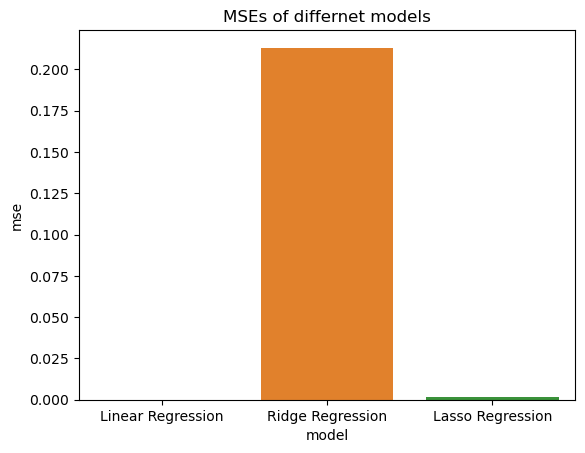

In [335]:
sns.barplot(mses, x="model", y="mse")
plt.title("MSEs of differnet models")

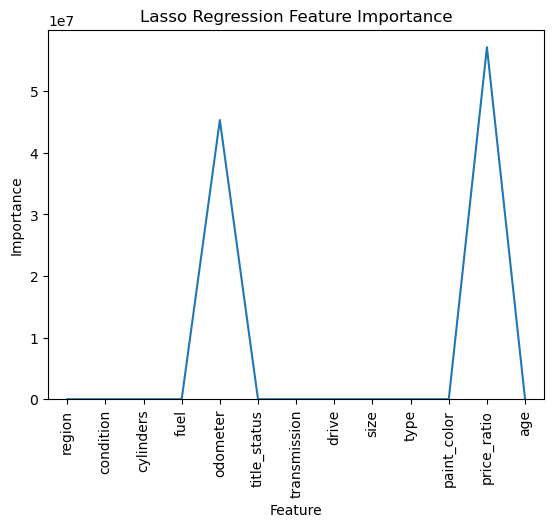

In [407]:
#plt.figure(figsize = (15,20))
#plt.subplot(2,1,1)

#plt.xticks(rotation=90)
#plt.title("Lasso Regression Feature Importance")
#plt.subplot(2,1,2)
sns.lineplot(importance_df_lasso, x="Feature", y="Mean")
sns.barplot(importance_df_lasso, x="Feature", y="Importance", alpha=0.7)
plt.xticks(rotation=90)
plt.title("Lasso Regression Feature Importance")
plt.show()

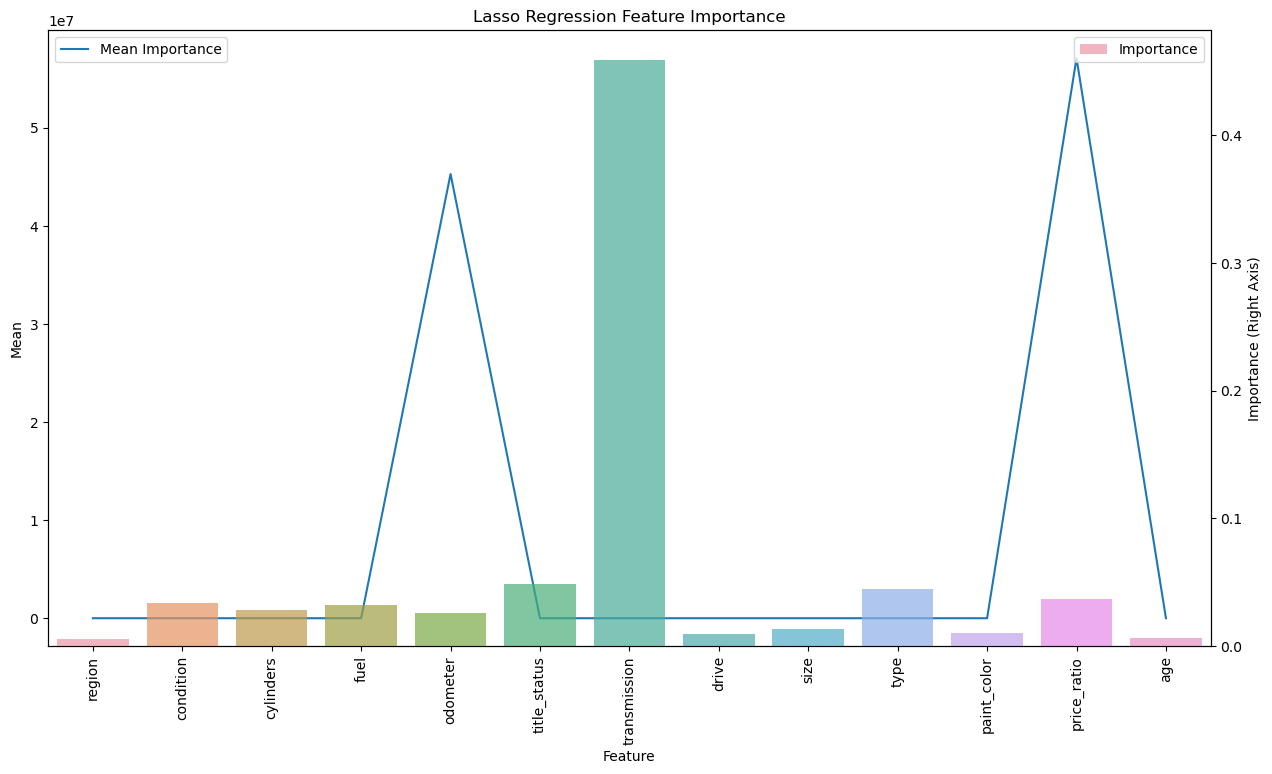

In [417]:
# Create the figure to accommodate both plots
plt.figure(figsize=(15, 8))

# Create the line plot on the primary y-axis (left)
ax1 = plt.subplot(111)  # Create a single subplot (full figure)
sns.lineplot(x="Feature", y="Mean", data=importance_df_lasso, ax=ax1, label="Mean Importance")

# Create the bar plot on the secondary y-axis (right)
ax2 = ax1.twinx()  # Create a secondary y-axis that shares the x-axis with ax1
sns.barplot(x="Feature", y="Importance", data=importance_df_lasso, ax=ax2, alpha=0.7, label="Importance")

# Rotate x-axis labels
for label in ax1.get_xticklabels():
    label.set_rotation(90)

# Add labels and title
plt.xlabel("Feature Importance")
plt.ylabel("Mean Importance (Left Axis)")
plt.ylabel("Importance (Right Axis)")
plt.title("Lasso Regression Feature Importance")

# Add a legend to distinguish between the plots
plt.legend()

#plt.tight_layout()  # Adjust spacing for better readability
plt.show()

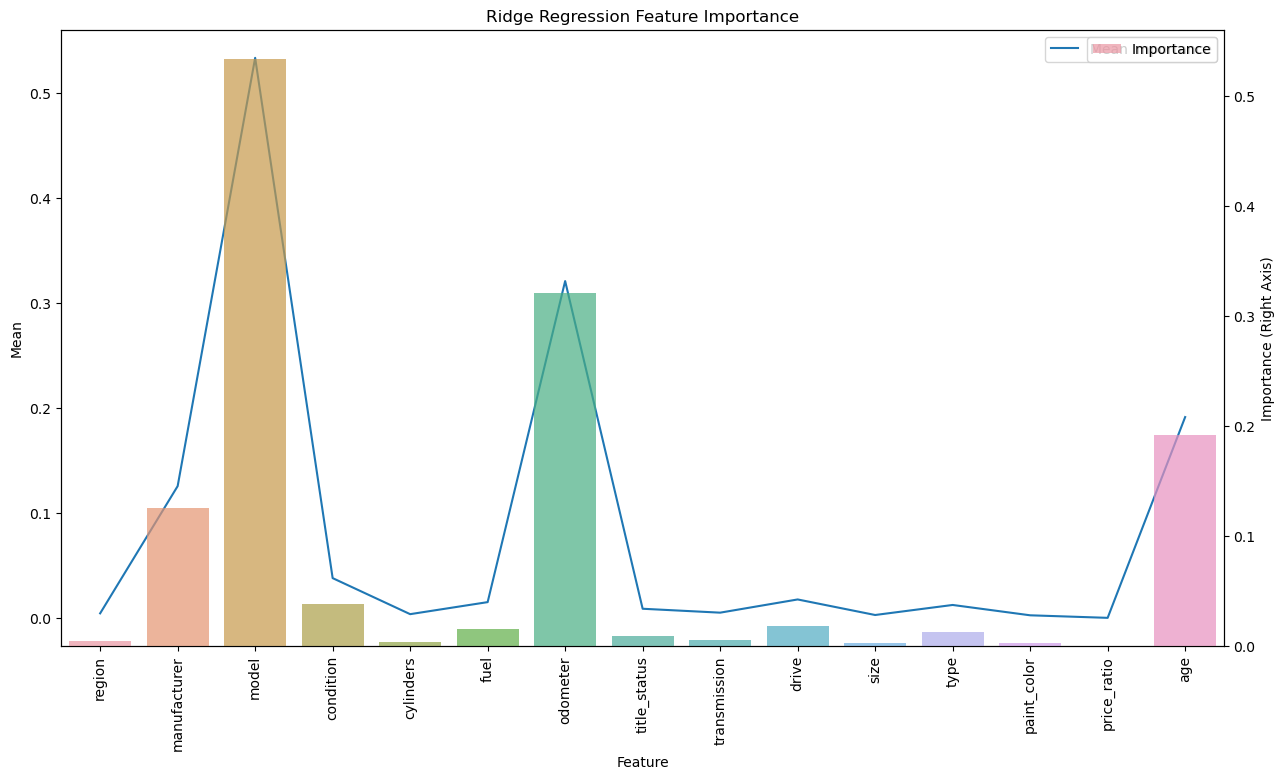

In [423]:
# Create the figure to accommodate both plots
plt.figure(figsize=(15, 8))

# Create the line plot on the primary y-axis (left)
ax1 = plt.subplot(111)  # Create a single subplot (full figure)
sns.lineplot(x="Feature", y="Mean", data=importance_df_ridge, ax=ax1, label="Mean Importance")

# Create the bar plot on the secondary y-axis (right)
ax2 = ax1.twinx()  # Create a secondary y-axis that shares the x-axis with ax1
sns.barplot(x="Feature", y="Importance", data=importance_df_ridge, ax=ax2, alpha=0.7, label="Importance")

# Rotate x-axis labels
for label in ax1.get_xticklabels():
    label.set_rotation(90)

# Add labels and title
plt.xlabel("Feature Importance")
plt.ylabel("Mean Importance (Left Axis)")
plt.ylabel("Importance (Right Axis)")
plt.title("Ridge Regression Feature Importance")

# Add a legend to distinguish between the plots
plt.legend()

#plt.tight_layout()  # Adjust spacing for better readability
plt.show()

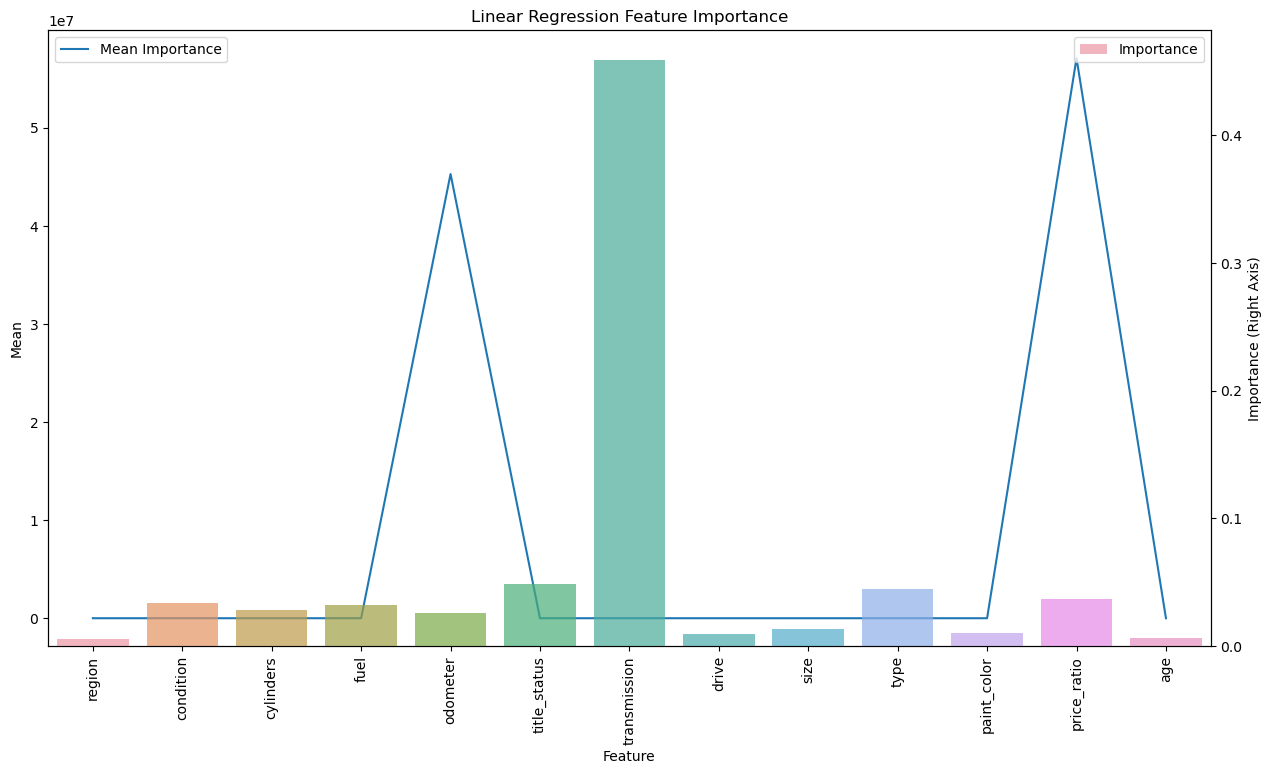

In [424]:
# Create the figure to accommodate both plots
plt.figure(figsize=(15, 8))

# Create the line plot on the primary y-axis (left)
ax1 = plt.subplot(111)  # Create a single subplot (full figure)
sns.lineplot(x="Feature", y="Mean", data=importance_df_lr, ax=ax1, label="Mean Importance")

# Create the bar plot on the secondary y-axis (right)
ax2 = ax1.twinx()  # Create a secondary y-axis that shares the x-axis with ax1
sns.barplot(x="Feature", y="Importance", data=importance_df_lr, ax=ax2, alpha=0.7, label="Importance")

# Rotate x-axis labels
for label in ax1.get_xticklabels():
    label.set_rotation(90)

# Add labels and title
plt.xlabel("Feature Importance")
plt.ylabel("Mean Importance (Left Axis)")
plt.ylabel("Importance (Right Axis)")
plt.title("Linear Regression Feature Importance")

# Add a legend to distinguish between the plots
plt.legend()

#plt.tight_layout()  # Adjust spacing for better readability
plt.show()

In [435]:
filtered_df1 = filtered_df[(filtered_df['price'] < 200000) & (filtered_df['odometer'] < 100000)]
sns.scatterplot(data=filtered_df[filtered_df['price']<200000 & filtered_df['odometer']<100000], x="odometer", y="price")

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.